<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/DS/%E8%AF%84%E4%BB%B7%E5%88%B7%E5%8D%95%E9%89%B4%E5%AE%9A%E4%B8%A4%E6%9D%BF%E6%96%A7%E4%BB%A3%E7%A0%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[评价刷单鉴定两板斧代码](https://github.com/seizeeveryday/DA-cases)

In [1]:
!wget https://github.com/seizeeveryday/DA-cases/raw/master/Comments/%E5%88%B7%E5%8D%95%E9%89%B4%E5%AE%9A%E8%AF%84%E4%BB%B7%E6%95%B0%E6%8D%AE.xlsx
!wget  https://github.com/seizeeveryday/DA-cases/raw/master/Comments/%E7%94%9F%E5%A7%9C%E9%98%B2%E8%84%B1%E6%B4%97%E5%8F%91%E6%B0%B4.xlsx

--2020-01-02 06:54:29--  https://github.com/seizeeveryday/DA-cases/raw/master/Comments/%E5%88%B7%E5%8D%95%E9%89%B4%E5%AE%9A%E8%AF%84%E4%BB%B7%E6%95%B0%E6%8D%AE.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/seizeeveryday/DA-cases/master/Comments/%E5%88%B7%E5%8D%95%E9%89%B4%E5%AE%9A%E8%AF%84%E4%BB%B7%E6%95%B0%E6%8D%AE.xlsx [following]
--2020-01-02 06:54:34--  https://raw.githubusercontent.com/seizeeveryday/DA-cases/master/Comments/%E5%88%B7%E5%8D%95%E9%89%B4%E5%AE%9A%E8%AF%84%E4%BB%B7%E6%95%B0%E6%8D%AE.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16178 (16K) [application/octet-stream]
Sa

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_excel('刷单鉴定评价数据.xlsx')
df.head()

,产品ID,价格,总销量,总评价数,规格类型
0,59497802,189.0,22153,12269,套装
1,55594403,95.0,227064,53842,NaN
2,56419172,79.0,733418,130106,正常规格
3,58567235,89.0,480040,103975,常规单品
4,53625235,59.0,253606,49611,常规单品


In [4]:
#计算评销比
df['评销比'] = df['总评价数'] / df['总销量'] * 100
df.head()

,产品ID,价格,总销量,总评价数,规格类型,评销比
0,59497802,189.0,22153,12269,套装,55.383018
1,55594403,95.0,227064,53842,NaN,23.712257
2,56419172,79.0,733418,130106,正常规格,17.739679
3,58567235,89.0,480040,103975,常规单品,21.659653
4,53625235,59.0,253606,49611,常规单品,19.562234


Text(0.5, 0, 'ratio')

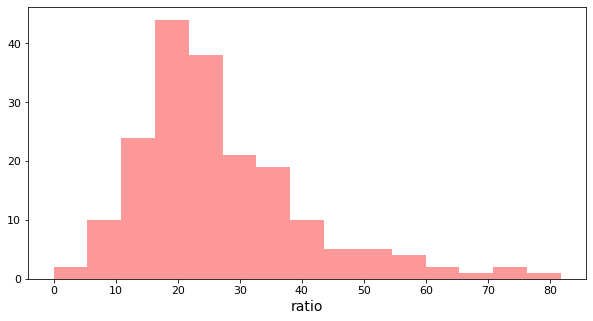

In [5]:
#查看评销比分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(df['评销比'],color = 'red',kde = False)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

ax.set_xlabel('ratio', fontsize=14)

In [6]:
#判断是否有刷单嫌疑
df['是否有刷单嫌疑'] = df['评销比'] > 40
df['是否有刷单嫌疑'].value_counts()

False    166
True      22
Name: 是否有刷单嫌疑, dtype: int64

In [7]:
#导入评论数据
comments = pd.read_excel('生姜防脱洗发水.xlsx')
comments.head()

,买家,初评内容,评价日期,追评
0,摈**唉,昨天晚上用了一次， 姜味很浓，用过一段时间再看看效果吧，好用会再回购的！,2019-11-29,-
1,t**4,最近脱发特别严重，鬓角的头发最是损失惨重，抱着试试看的态度来的，目前我用了1个疗程感觉恢复得...,2019-11-29,-
2,露**发,最近头发大把大把的脱，特别是洗头的时候！刚开始是抱着试试的心态，每次都会隔断时间拍照自己对比...,2019-11-29,-
3,t**6,质量很好，效果不错,2019-11-29,-
4,去**5,这次放假回家看到老爸的大脑门，莫名的揪心，老爸为家庭操心了太多，头发一直在掉，这次买了这款防...,2019-11-29,-


In [8]:
#评价长度筛选
comments['评价长度'] = comments['初评内容'].apply(len)
comments = comments.loc[comments['评价长度'] > 15,:]
print(comments.shape)
comments.head()

(1200, 5)


,买家,初评内容,评价日期,追评,评价长度
0,摈**唉,昨天晚上用了一次， 姜味很浓，用过一段时间再看看效果吧，好用会再回购的！,2019-11-29,-,36
1,t**4,最近脱发特别严重，鬓角的头发最是损失惨重，抱着试试看的态度来的，目前我用了1个疗程感觉恢复得...,2019-11-29,-,80
2,露**发,最近头发大把大把的脱，特别是洗头的时候！刚开始是抱着试试的心态，每次都会隔断时间拍照自己对比...,2019-11-29,-,85
4,去**5,这次放假回家看到老爸的大脑门，莫名的揪心，老爸为家庭操心了太多，头发一直在掉，这次买了这款防...,2019-11-29,-,76
5,德**艺,以前就用过这款生姜洗发水防脱发效果真的很好，这次这个疗程是买来巩固的用过之后脱发已经很少了，...,2019-11-29,-,60


In [9]:
#按内容排序，找到嫌疑评价
comments = comments.sort_values(['评价长度','初评内容'],ascending = False)
comments.head(6)

,买家,初评内容,评价日期,追评,评价长度
1307,你**个,感觉越洗头发掉得越多，每次洗必须要用洗发水两次以上，还要搓按5分钟，这样洗下去头发本来就少，...,2019-07-11,我是短发，洗一次掉这么多，以前洗只掉几根，洗了之后头痒的要死，当初客服说用了不适应可以退，现...,348
1147,y**8,使用了第二次才来评价的，我头发很长（齐膝）掉得特别厉害。之前使用防脱洗发水用完之后呢换成了潘...,2019-09-02,长头发的妹子可以试试这款洗发水哦！我现在掉发已经开始在变少了，开心,290
629,0**b,1客服小海马说寄来的品牌是柏诗春天，我下单购买的海洋诗韵，俩不同品牌都是一个厂家生产的，让我...,2019-10-22,-,290
151,t**1,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-11-21,-,177
587,女**8,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-10-24,-,177
674,e**1,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-10-16,-,177


In [11]:
#统计重复评价数
#按内容分组，统计每条评价出现的次数
filt = comments.groupby('初评内容')['买家'].count().reset_index()
filt.columns = ['初评内容','重复次数']

#统计重复评价出现的次数
reap = filt.loc[filt['重复次数'] > 1,'重复次数'].sum()

print('总评价数：',len(comments))
print('重复的评价数占比：{}%'.format(reap / len(comments) * 100))

总评价数： 1200
重复的评价数占比：31.5%
